# Phys 41 Homework 5 Jake Anderson 2/16/2024

## Problem 1

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
# These values of s and a were obtained using the method described in the homework prompt.
# The code for obtaining these values is omitted so that when I publish my homework to GitHub my PID isn't available.

s = 4.9409405825933845
a = -0.8078479736939671

In [3]:
def signal(N):
    times = np.linspace(0, 10, N)
    rng = np.random.default_rng()
    return np.array([a * time + s * rng.standard_normal() for time in times])

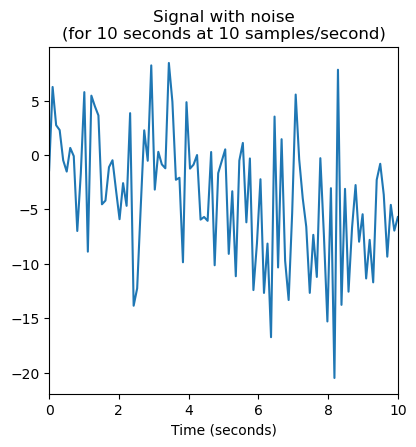

In [4]:
fig = plt.figure(figsize=(4.5, 4.5))
data = signal(100)
plt.plot(np.linspace(0, 10, 100), data)
plt.title("Signal with noise\n(for 10 seconds at 10 samples/second)")
plt.xlim(0, 10)
plt.xlabel("Time (seconds)")
fig.show()

In [5]:
def best_fit_error(params, data):
    x = params
    return np.sum((data - (x * np.linspace(0, 10, len(data)))) ** 2)


def best_fit_slope(data):
    # Find the line of best fit using scipy
    x0 = 1
    result = minimize(best_fit_error, x0, args=(data))
    return result.x[0]


m = best_fit_slope(data)
print(m)

-0.7868982872680168


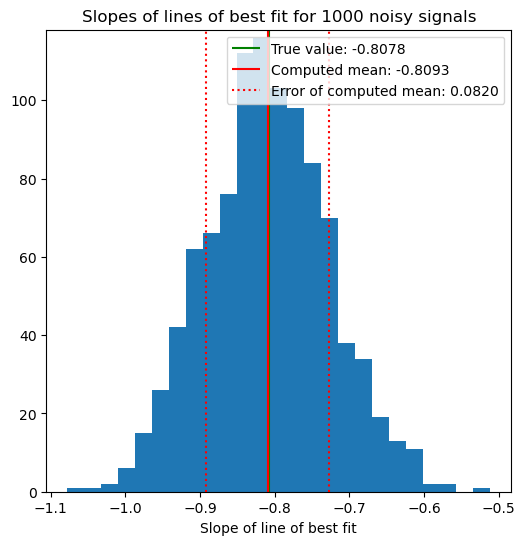

In [6]:
slopes = []
for _ in range(0, 1000):
    data = signal(100)
    m = best_fit_slope(data)
    slopes.append(m)

mean = np.mean(slopes)
sd = np.std(slopes)

fig = plt.figure(figsize=(6, 6))
counts, bins = np.histogram(slopes, bins=25)
plt.hist(
    bins[:-1], bins, weights=counts
)  # From https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

plt.vlines(
    x=a,
    ymin=0,
    ymax=max(counts) + 10,
    color="green",
    label=f"True value: {a:.4f}",
)

plt.vlines(
    x=mean,
    ymin=0,
    ymax=max(counts) + 10,
    color="red",
    label=f"Computed mean: {mean:.4f}",
)
plt.vlines(
    x=[mean + sd, mean - sd],
    ymin=0,
    ymax=max(counts) + 10,
    color="red",
    ls=":",
    label=f"Error of computed mean: {sd:.4f}",
)

plt.ylim(0, max(counts) + 2)
plt.xlabel("Slope of line of best fit")
plt.legend()
plt.title("Slopes of lines of best fit for 1000 noisy signals")
fig.show()